In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
weight = 0.5
bias = 0.3

start = 0
end =1
step =0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight *X+bias
len(X),len(y)

(100, 100)

In [4]:
split = int(0.8 *len(X))
xtrain,ytrain = X[:split], y[:split]
xtest,ytest = X[split:], y[split:]
len(xtrain), len(ytrain), len(xtest), len(ytest)

(80, 80, 20, 20)

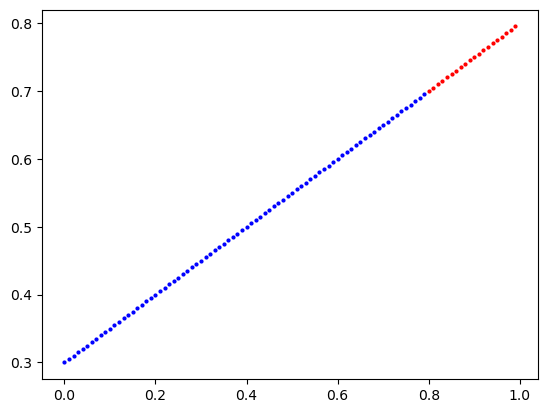

In [11]:
def plt_prediction(train_data = xtrain, train_labels = ytrain,test_data = xtest, test_labels = ytest, predictions = None):

    plt.scatter(xtrain, ytrain, c='b', label='Train Data',s=4)
    plt.scatter(xtest, ytest, c='r', label='Test Data',s=4)
    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', label='Predictions', s=4)
plt_prediction()

In [13]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

In [27]:
torch.manual_seed(42)
model0 = LinearRegressionModel()
print(list(model0.parameters()))

[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]


In [19]:
with torch.inference_mode():
   prediction = model0(xtest)
print(prediction)

tensor([[1.4416],
        [1.4493],
        [1.4569],
        [1.4646],
        [1.4722],
        [1.4799],
        [1.4875],
        [1.4952],
        [1.5028],
        [1.5104],
        [1.5181],
        [1.5257],
        [1.5334],
        [1.5410],
        [1.5487],
        [1.5563],
        [1.5640],
        [1.5716],
        [1.5793],
        [1.5869]])


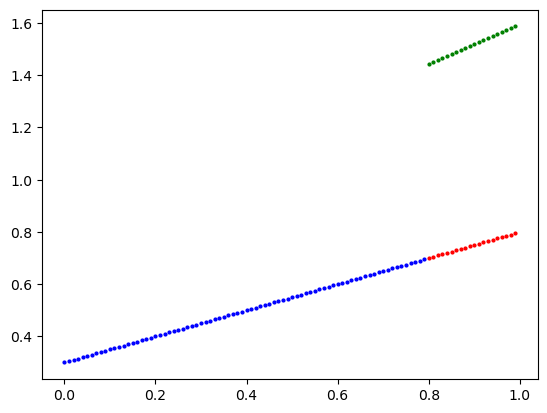

In [28]:
plt_prediction(predictions=prediction)

In [29]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.01)

In [32]:
epochs = 100
epoch_count = []
trainloss_values =[]
testloss_values =[]
for epoch in range(epochs):
    model0.train()
    pred = model0(xtrain)
    loss = loss_fn(pred, ytrain)
    print(f"loss:{loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model0.eval()
    with torch.inference_mode():
        test_pred = model0(xtest)
        test_loss = loss_fn(test_pred, ytest)
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            trainloss_values.append(loss.item())
            testloss_values.append(test_loss.item())
            print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}')

loss:0.006170978769659996
Epoch: 0 | Train Loss: 0.006170978769659996 | Test Loss: 0.003361061215400696
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
Epoch: 10 | Train Loss: 0.006170978769659996 | Test Loss: 0.003361061215400696
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
Epoch: 20 | Train Loss: 0.006170978769659996 | Test Loss: 0.003361061215400696
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005389261059463024
loss:0.006170978769659996
loss:0.005

In [33]:
model0.state_dict()

OrderedDict([('linear.weight', tensor([[0.5080]])),
             ('linear.bias', tensor([0.3030]))])

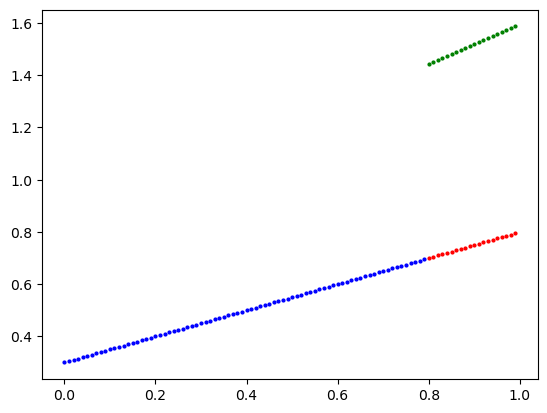

In [35]:
#compare olf and new prediction using scatter
plt_prediction(predictions=prediction)

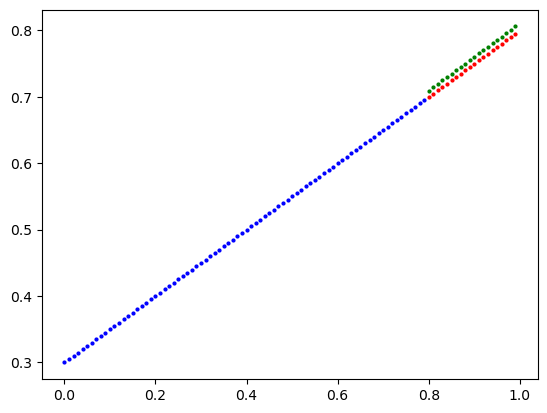

In [36]:
with torch.inference_mode():
    new_prediction = model0(xtest)
plt_prediction(predictions=new_prediction)